In [31]:
# Import libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Adjust pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncation


df = pd.read_csv('/Users/joezhou/Downloads/Mentum Assignment Data/Customer-churn-records.csv',sep=",")



In [2]:
# Part 2 
# Now that you have access to the dataset, it’s time to start understanding the statistical properties of the data. These activities will all be carried out in Ed Lessons.
# Calculate basic statistical measures such as mean, median, mode, and percentiles for each attribute. 
# Recognise common distributions in the data, such as Gaussian, binomial, Poisson, etc. 
# Plan what visualisations you will include in your report and describe how you will explore and visualise the data.


In [ ]:
# Part 2 
# Calculate basic statistical measures such as mean, median, mode, and percentiles for each attribute. 

# identify variable types and records
df.info()

# basic statistics
df.describe().round(1).applymap(lambda x: f'{x:,.1f}').transpose()


In [ ]:
# Part 2 

# Identify mode for every variable and respective frequencies

# Assuming df is your DataFrame
mode_freq = {}

for column in df.columns:
    # Calculate the mode(s) of the column
    mode_values = df[column].mode()
    
    # Create an empty list to store mode and frequency pairs
    mode_list = []
    
    for mode in mode_values:
        # Calculate the frequency of the mode
        frequency = df[column].value_counts().get(mode, 0)
        mode_list.append((mode, frequency))
    
    # Store the mode and its frequency in the dictionary
    mode_freq[column] = mode_list

# Print the results
for column, modes in mode_freq.items():
    print(f'Mode(s) of {column}:')
    for mode, frequency in modes:
        print(f'  Value: {mode}, Frequency: {frequency}')


In [ ]:
# Part 2 

# distribution graphs
# List of numerical and categorical columns, as some are numerical whilest others are categorical
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# identified as objects in the underlying data
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Card Type']

# Combine the lists to get the total number of variables
all_columns = numerical_columns + categorical_columns
total_columns = len(all_columns)

# Determine grid size (e.g., 3 columns)
n_cols = 3
n_rows = (total_columns // n_cols) + (total_columns % n_cols > 0)

# Set up the plotting style and figure size
sns.set(style="whitegrid")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create plots for each variable
for i, col in enumerate(all_columns):
    if col in numerical_columns:
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    else:
        sns.countplot(x=col, data=df, ax=axes[i])
    
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency' if col in numerical_columns else 'Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
# Part 3
# Generating relevant charts to visualise the distributions of different attributes will be your starting point for this part. 
# Generate histograms, box plots and other relevant charts to visualise data distributions
# Generate a correlation matrix to understand the relationships between different attributes. 
# Identify and address any data quality issues in the dataset. 

In [ ]:
# Part 3 

# List of numerical and categorical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 
                       'Complain', 'Card Type']

# Combine the lists to get the total number of variables
all_columns = numerical_columns + categorical_columns
total_columns = len(all_columns)

# Determine grid size (e.g., 4 columns)
n_cols = 4
n_rows = (total_columns // n_cols) + (total_columns % n_cols > 0)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create plots for each variable
for i, col in enumerate(all_columns):
    if col in numerical_columns:
        sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel('Exited')
        axes[i].set_ylabel(col)
    else:
        sns.countplot(x=col, hue='Exited', data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
# Part 3

# Convert categorical variables into numerical variables to understand relationship to churn for correlation analysis

df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type'], drop_first=False)

# Identify and convert boolean columns to integers
bool_columns = df_encoded.select_dtypes(include='bool').columns

df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# df_encoded.head()
# df_encoded.info()



In [ ]:
# Part 3: create heatmap and correlation chart 

# List of shortlisted columns
shortlist_columns = [#outcome variable used for prediction
                     'Exited',
                     #Numerical variables from source file
                     'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score','Point Earned',
                    #transformed variable from categories
                    'Geography_NSW', 'Geography_QLD', 'Geography_VIC','Gender_Female','Gender_Male',
                    'HasCrCard_0','HasCrCard_1','IsActiveMember_0','IsActiveMember_1','Complain_0','Complain_1',
                    'Card Type_DIAMOND', 'Card Type_GOLD','Card Type_PLATINUM','Card Type_SILVER'
                     ]


# Calculate the correlation matrix
correlation_matrix = df_encoded[shortlist_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",annot_kws={"size": 8}, cmap='coolwarm',
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=2)

# Set title and show the plot
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()




# Find pairs with correlation coefficient >= 0.8
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the pairs and their R-squared values
for pair in high_corr_pairs:
    var1, var2, corr = pair
    r_squared = corr ** 2
    print(f"Variables: {var1} and {var2} have a correlation of {corr:.2f} and R-squared of {r_squared:.2f}")



In [ ]:
# data quality checks, for part 3
# identify, missing values, duplicates, data types, value range and unique values in categorical columns


# Check for duplicate rows
print(df[df.duplicated(subset=df.columns)])
 
# Check for duplicate primary keys
print(df[df.duplicated(subset='CustomerId')])

# note the function below common practice used within professional context

def check_data_quality(df):

    # Check for missing values
    print("Missing Values:")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print(missing_values)
    else:
        print("No missing values found.")
    
    print("\n")
    
    # Check for duplicates
    print("Duplicate Rows:")
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"Number of duplicate rows: {duplicates}")
    else:
        print("No duplicate rows found.")
    
    print("\n")
    
    # Check for incorrect data types
    print("Data Types:")
    incorrect_types = df.dtypes[df.dtypes == 'object'].index
    print(f"Object types: {list(incorrect_types)}")
    
    # Check for value ranges and outliers (for numerical columns)
    print("\nValue Ranges and Outliers:")
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        min_val = df[column].min()
        max_val = df[column].max()
        print(f"{column}: Min = {min_val}, Max = {max_val}")
        
        # Outliers can be detected using z-scores or IQR, here we use IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        if not outliers.empty:
            print(f"Outliers detected in {column}: {len(outliers)} rows")
        else:
            print(f"No outliers detected in {column}")

    print("\n")
    
    # Check for unique values in categorical columns
    print("Unique Values in Categorical Columns:")
    for column in df.select_dtypes(include=['object']).columns:
        unique_values = df[column].unique()
        print(f"{column}: {len(unique_values)} unique values")

# Call function
check_data_quality(df)




In [11]:



# Part 3
# boot strapping

# import numpy as np
# from sklearn.utils import resample
# from scipy.stats import sem, t, norm

# # Bootstrapping
# # Bootstrapping is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.
# # This allows us to assess the variability of our sample statistics and build confidence intervals.
# # We can use the `resample()` method from `sklearn`
# bootstrap_sample = resample(df, replace=True, n_samples=1000)
# print("\nbootstrap_sample Dimensions:")
# print(f"Row count:{bootstrap_sample.shape[0]}")
# print(f"Attribute count:{bootstrap_sample.shape[1]}")
# print(" ")
# #To print a small sample of the DataFrame data, we can use the `head()` method.
# print("\nbootstrap_sample Data:")
# display(bootstrap_sample.head())



In [12]:
# Part 4
# For this final part, formulate hypotheses related to customer churn. For example, ‘customers with a lower balance are more likely to churn.’ 
# Apply statistical significance tests to evaluate these hypotheses, interpret the results of your statistical tests and draw valid conclusions. This will help you gain an understanding of the principles of experimental design.
# Create a plan for a controlled experiment to test one of your hypotheses. Include the experiment design in your PowerPoint report.
# Write a conclusion for your report and include it in the PowerPoint.





In [48]:
# part 4
# Hypothesis testing

# variable = age
import scipy.stats as stats

# Split the data into groups
exited = df[df['Exited'] == 1]['Age']
not_exited = df[df['Exited'] == 0]['Age']

# Perform t-test
t_stat, p_value = stats.ttest_ind(exited, not_exited, equal_var=False)
print("Age:",f"t-statistic: {t_stat.round(2)}, p-value: {p_value.round(2)}")


# variable = Tenure
# Split the data into groups
exited = df[df['Exited'] == 1]['Tenure']
not_exited = df[df['Exited'] == 0]['Tenure']

# Perform t-test
t_stat, p_value = stats.ttest_ind(exited, not_exited, equal_var=False)
print("Tenure:",f"t-statistic: {t_stat.round(2)}, p-value: {p_value.round(2)}")

# Variable = Geography
# Create a contingency table
contingency_table = pd.crosstab(df['Geography'], df['Exited'])

# Perform Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print("Geography:",f"Chi2: {chi2.round(2)}, p-value: {p.round(2)}")


# Variable = Complain
# Create a contingency table
contingency_table = pd.crosstab(df['Complain'], df['Exited'])

# Perform Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print("Complain:",f"Chi2: {chi2.round(2)}, p-value: {p.round(2)}")

# Variable = Satisfaction Score
# Split the data into groups
exited = df[df['Exited'] == 1]['Satisfaction Score']
not_exited = df[df['Exited'] == 0]['Satisfaction Score']

# Perform t-test
t_stat, p_value = stats.ttest_ind(exited, not_exited, equal_var=False)
print("Satisfaction Score:",f"t-statistic: {t_stat.round(2)}, p-value: {p_value.round(2)}")

# Variable = Credit Score
# Split the data into groups
exited = df[df['Exited'] == 1]['CreditScore']
not_exited = df[df['Exited'] == 0]['CreditScore']

# Perform t-test
t_stat, p_value = stats.ttest_ind(exited, not_exited, equal_var=False)
print("Credit Score:",f"t-statistic: {t_stat.round(2)}, p-value: {p_value.round(2)}")

# Varible = Balance
# Split the data into groups
exited = df[df['Exited'] == 1]['Balance']
not_exited = df[df['Exited'] == 0]['Balance']

# Perform t-test
t_stat, p_value = stats.ttest_ind(exited, not_exited, equal_var=False)
print("Balance:",f"t-statistic: {t_stat.round(2)}, p-value: {p_value.round(2)}")

# Variale = active member
# Create a contingency table
contingency_table = pd.crosstab(df['IsActiveMember'], df['Exited'])

# Perform Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print("Active Member:",f"Chi2: {chi2.round(2)}, p-value: {p.round(2)}")



Age: t-statistic: 30.42, p-value: 0.0
Tenure: t-statistic: -1.35, p-value: 0.18
Geography: Chi2: 300.63, p-value: 0.0
Complain: Chi2: 9907.91, p-value: 0.0
Satisfaction Score: t-statistic: -0.59, p-value: 0.56
Credit Score: t-statistic: -2.6, p-value: 0.01
Balance: t-statistic: 12.48, p-value: 0.0
Active Member: Chi2: 243.69, p-value: 0.0


             Exited   CreditScore           Age        Tenure        Balance  NumOfProducts  EstimatedSalary  Satisfaction Score  Point Earned     Geography        Gender    HasCrCard  IsActiveMember     Card Type
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000     10000.000000        10000.000000  10000.000000  10000.000000  10000.000000  10000.00000    10000.000000  10000.000000
mean       0.203800    650.528800     38.921800      5.012800   76485.889288       1.530200    100090.239881            3.013800    606.515100      0.749500      0.545700      0.70550        0.515100      1.498000
std        0.402842     96.653299     10.487806      2.892174   62397.405202       0.581654     57510.492818            1.405919    225.924839      0.830433      0.497932      0.45584        0.499797      1.118356
min        0.000000    350.000000     18.000000      0.000000       0.000000       1.000000        11.580000            1.000000    119.000000  

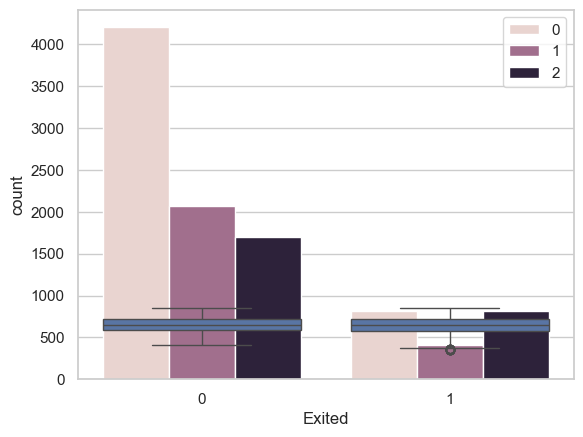

/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_13682/2856422275.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Gender'] = label_encoder.fit_transform(df_s['Gender'])
/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_13682/2856422275.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Geography'] = label_encoder.fit_transform(df_s['Geography'])
/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_13682/2856422275.py:40: SettingWithCopyWarning: 
A value is trying 

IsActiveMember       -0.156356
Gender               -0.106267
NumOfProducts        -0.047611
CreditScore          -0.026771
Tenure               -0.013656
Card Type            -0.010861
HasCrCard            -0.006976
Satisfaction Score   -0.005849
Point Earned         -0.004628
EstimatedSalary       0.012490
Balance               0.118577
Geography             0.153518
Age                   0.285296
Exited                1.000000
Name: Exited, dtype: float64
Chi-Square Test p-value for Geography: 5.245736109572763e-66
T-Test p-value for CreditScore: 0.0074220372427342435
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2378
           1       0.36      0.06      0.10       622

    accuracy                           0.78      3000
   macro avg       0.58      0.52      0.49      3000
weighted avg       0.71      0.78      0.72      3000

ROC AUC Score: 0.5162488946100239


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Additional code is used to develop 
# Develop a simple model to understand key drivers of the variables in relationship to exit customerse
# Note: this include the experimentation with removing the complain variable due to its correlation with the exit variable

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from scipy.stats import chi2_contingency, ttest_ind

# shortlist
shortlist_columns_model = [#outcome variable used for prediction
                            'Exited',
                            #Numerical variables from source file
                            'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                            'EstimatedSalary', 'Satisfaction Score','Point Earned',
                            #categotical variables
                            'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Card Type'
                            # , 'Complain'
                            ]


# Calculate the correlation matrix
df_s = df[shortlist_columns_model]



# EDA
print(df_s.describe())
print(df_s['Exited'].value_counts())

# Visualization
sns.countplot(data=df_s, x='Exited', hue='Geography')
sns.boxplot(data=df_s, x='Exited', y='CreditScore')
plt.show()

# Encoding categorical variables
label_encoder = LabelEncoder()
df_s['Gender'] = label_encoder.fit_transform(df_s['Gender'])
df_s['Geography'] = label_encoder.fit_transform(df_s['Geography'])
df_s['Card Type'] = label_encoder.fit_transform(df_s['Card Type'])

# Correlation analysis
correlation = df_s.corr()['Exited'].sort_values()
print(correlation)

# Statistical tests
# Chi-Square Test for categorical variables
contingency_table = pd.crosstab(df['Geography'], df_s['Exited'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Test p-value for Geography: {p}')

# T-Test for numerical variables
exited = df_s[df_s['Exited'] == 1]
not_exited = df_s[df_s['Exited'] == 0]
t_stat, p_value = ttest_ind(exited['CreditScore'], not_exited['CreditScore'])
print(f'T-Test p-value for CreditScore: {p_value}')

# Model Building
X = df_s.drop(['Exited'], axis=1)
y = df_s['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')
